This notebook visualizes how mean and standard deviation affect a dataset and its fitted normal distribution (bell curve).
Edit the data array to see how the curve shifts and widens/narrows.
This helps build intuition for central tendency and dispersion.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi

In [18]:
# Editable, hand-crafted dataset (change values to see effects)
data = np.array([
    45, 48, 50, 52, 55, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67,
    68, 69, 70, 70, 71, 72, 73, 74, 75, 76, 77, 78, 80, 82, 85
])

print("Data:", data)
print("Count:", len(data))

Data: [45 48 50 52 55 57 58 60 61 62 63 64 65 66 67 68 69 70 70 71 72 73 74 75
 76 77 78 80 82 85]
Count: 30


In [19]:
mean_val = data.mean()
std_val = data.std(ddof=0)  # population SD for visualization

print("Mean:", round(mean_val, 2))
print("Standard Deviation:", round(std_val, 2))

Mean: 66.43
Standard Deviation: 10.08


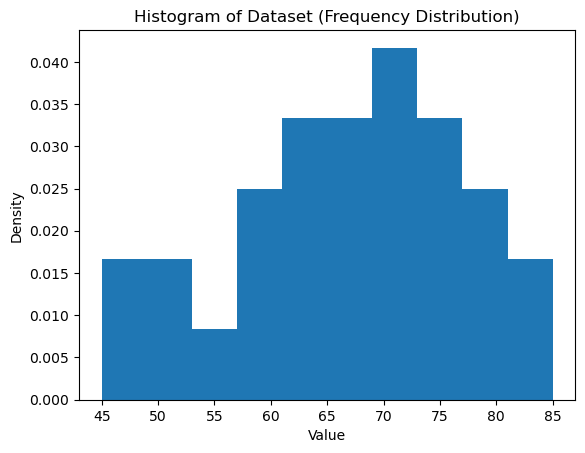

In [20]:
plt.figure()
plt.hist(data, bins=10, density=True)
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Histogram of Dataset (Frequency Distribution)")
plt.show()

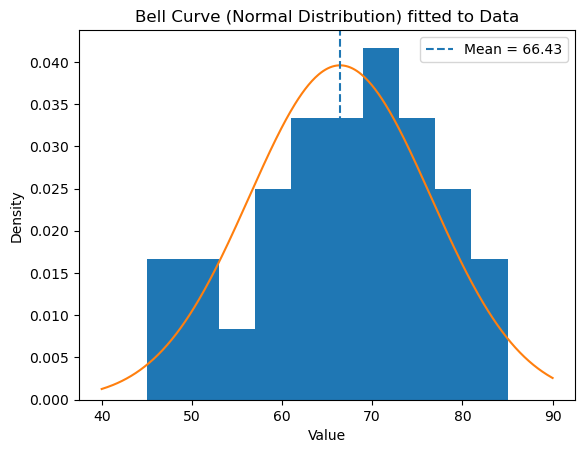

In [21]:
xs = np.linspace(data.min() - 5, data.max() + 5, 400)
pdf = (1 / (std_val * sqrt(2 * pi))) * np.exp(-0.5 * ((xs - mean_val) / std_val) ** 2)

plt.figure()
plt.hist(data, bins=10, density=True)
plt.plot(xs, pdf)
plt.axvline(mean_val, linestyle='--', label=f"Mean = {mean_val:.2f}")
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Bell Curve (Normal Distribution) fitted to Data")
plt.legend()
plt.show()

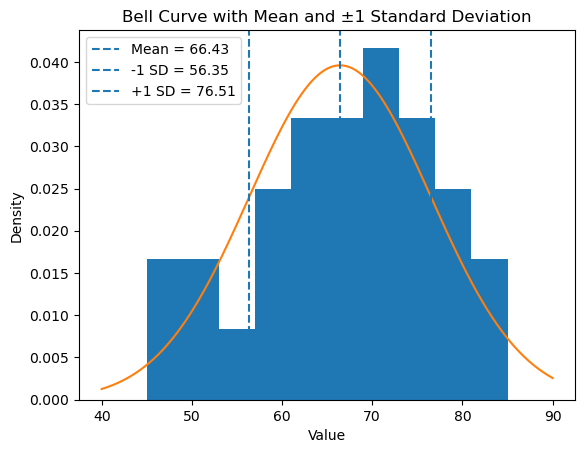

In [22]:
plt.figure()
plt.hist(data, bins=10, density=True)
plt.plot(xs, pdf)
plt.axvline(mean_val, linestyle='--', label=f"Mean = {mean_val:.2f}")
plt.axvline(mean_val - std_val, linestyle='--', label=f"-1 SD = {mean_val - std_val:.2f}")
plt.axvline(mean_val + std_val, linestyle='--', label=f"+1 SD = {mean_val + std_val:.2f}")
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Bell Curve with Mean and ±1 Standard Deviation")
plt.legend()
plt.show()

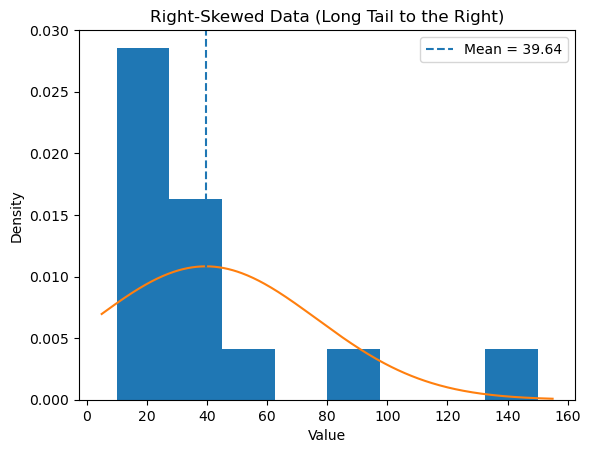

Right-skewed Mean: 39.64 SD: 36.85


In [23]:
# Right-skewed dataset (e.g., income-like data)
right_skewed = np.array([
    10, 12, 15, 18, 20, 22, 25, 28, 30, 35, 40, 60, 90, 150
])

mean_r = right_skewed.mean()
std_r = right_skewed.std(ddof=0)

xs_r = np.linspace(right_skewed.min()-5, right_skewed.max()+5, 400)
pdf_r = (1/(std_r * sqrt(2*pi))) * np.exp(-0.5 * ((xs_r - mean_r)/std_r)**2)

plt.figure()
plt.hist(right_skewed, bins=8, density=True)
plt.plot(xs_r, pdf_r)
plt.axvline(mean_r, linestyle='--', label=f"Mean = {mean_r:.2f}")
plt.title("Right-Skewed Data (Long Tail to the Right)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

print("Right-skewed Mean:", round(mean_r,2), "SD:", round(std_r,2))

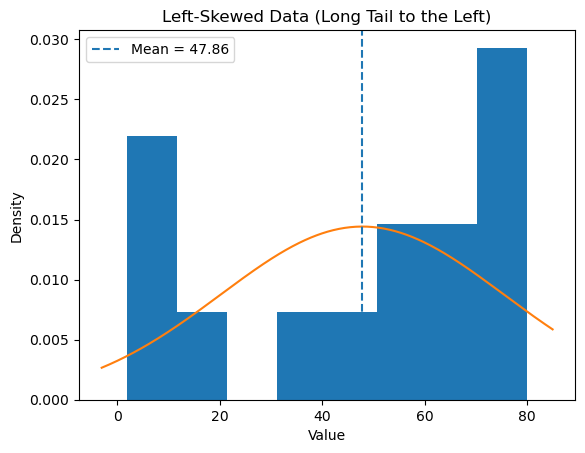

Left-skewed Mean: 47.86 SD: 27.67


In [24]:
# Left-skewed dataset (e.g., tough exam marks)
left_skewed = np.array([
    2, 5, 8, 20, 35, 45, 55, 60, 65, 70, 72, 75, 78, 80
])

mean_l = left_skewed.mean()
std_l = left_skewed.std(ddof=0)

xs_l = np.linspace(left_skewed.min()-5, left_skewed.max()+5, 400)
pdf_l = (1/(std_l * sqrt(2*pi))) * np.exp(-0.5 * ((xs_l - mean_l)/std_l)**2)

plt.figure()
plt.hist(left_skewed, bins=8, density=True)
plt.plot(xs_l, pdf_l)
plt.axvline(mean_l, linestyle='--', label=f"Mean = {mean_l:.2f}")
plt.title("Left-Skewed Data (Long Tail to the Left)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

print("Left-skewed Mean:", round(mean_l,2), "SD:", round(std_l,2))

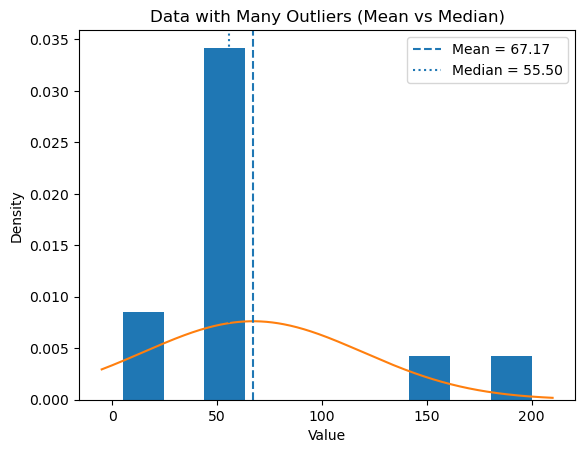

Outlier Data -> Mean: 67.17 Median: 55.5 SD: 52.34


In [27]:
# Dataset with many outliers
outlier_data = np.array([
    50, 52, 53, 55, 56, 57, 58, 60,   # main cluster
    5, 10, 150, 200                  # outliers
])

mean_o = outlier_data.mean()
median_o = np.median(outlier_data)
std_o = outlier_data.std(ddof=0)

xs_o = np.linspace(outlier_data.min()-10, outlier_data.max()+10, 400)
pdf_o = (1/(std_o * sqrt(2*pi))) * np.exp(-0.5 * ((xs_o - mean_o)/std_o)**2)

plt.figure()
plt.hist(outlier_data, bins=10, density=True)
plt.plot(xs_o, pdf_o)
plt.axvline(mean_o, linestyle='--', label=f"Mean = {mean_o:.2f}")
plt.axvline(median_o, linestyle=':', label=f"Median = {median_o:.2f}")
plt.title("Data with Many Outliers (Mean vs Median)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

print("Outlier Data -> Mean:", round(mean_o,2), "Median:", round(median_o,2), "SD:", round(std_o,2))

Tight Mean: 50.0 SD: 1.4142135623730951
Wide Mean: 50.0 SD: 28.284271247461902


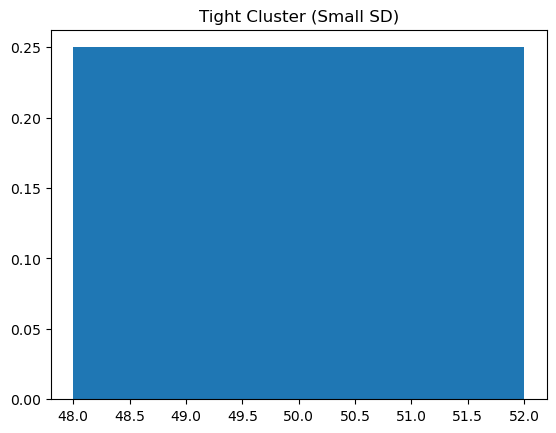

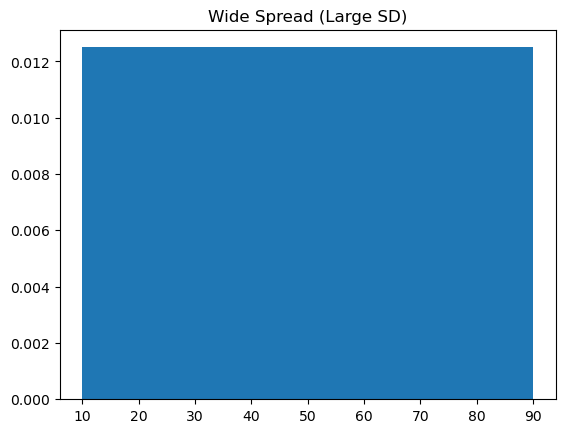

In [28]:
# Same mean, different SD
tight = np.array([48, 49, 50, 51, 52])
wide = np.array([10, 30, 50, 70, 90])

print("Tight Mean:", tight.mean(), "SD:", tight.std())
print("Wide Mean:", wide.mean(), "SD:", wide.std())

plt.figure()
plt.hist(tight, bins=5, density=True)
plt.title("Tight Cluster (Small SD)")
plt.show()

plt.figure()
plt.hist(wide, bins=5, density=True)
plt.title("Wide Spread (Large SD)")
plt.show()